In [1]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *

In [2]:
username = !whoami
username

['alibow']

In [3]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = [2,3,4,5]
sex_ids = [1,2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]

In [4]:
coverage_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/lsff_input_coverage_data.csv'

In [5]:
location_ids = (list(
                pd.read_csv(coverage_data_dir)
                .location_id
                .unique()))
location_ids

[179, 163, 214, 161, 165, 190, 189, 196, 201, 180, 15, 164, 20]

In [6]:
nutrient = 'iron'
vehicle = 'wheat flour'
effective_fractions = [0, 
                       0, 
                       0.1666666667, 
                       0.9166666667]

In [7]:
baseline_coverage, counterfactual_coverage = generate_overall_coverage_rates(
                                                     coverage_data_dir,
                                                     nutrient, 
                                                     vehicle,
                                                     coverage_levels,
                                                     years,
                                                     location_ids,
                                                    ['under-5','total population',np.nan])

# HEMOGLOBIN

In [8]:
from scipy.stats import norm

# mean and 0.975-quantile of normal distribution for mean difference (MD)
mean = 3
q_975 = 6.1

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

std = (q_975 - mean) / q_975_stdnorm # std dev of normal distribution

# Frozen normal distribution for MD, representing uncertainty in our effect size
hb_md_distribution = norm(mean, std)

In [9]:
mean_difference_hemoglobin_fort = generate_normal_rr_deficiency_nofort_draws(mean, std, location_ids)
mean_difference_hemoglobin_fort.head()

draws,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
179,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
163,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
214,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
161,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
165,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852


In [10]:
effective_baseline_coverage = get_effective_iron_hemoglobin_coverage(baseline_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)
effective_counterfactual_coverage = get_effective_iron_hemoglobin_coverage(counterfactual_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)

delta_effective_coverage = effective_counterfactual_coverage - effective_baseline_coverage
delta_effective_coverage

draw_0    draw_1  \
location_id sex_id age_group_id year coverage_level                       
15          1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.197735  0.197580   
                                     0.8             0.316376  0.316128   
                                2025 0.2             0.079094  0.079032   
                                     0.5             0.197735  0.197580   
                                     0.8             0.316376  0.316128   

                                                       draw_2    draw_3  \
location_id sex_id age_group_id year coverage_level                       
15          1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.197620  0.197641   
                                     0.8             0.316192  0.316225   
                                2025 0.2             0.079048  0.079056   
                                     0.5             0.197620  0.197641   
                                     0.8             0.316192  0.316225   

                                                       draw_4    draw_5  \
location_id sex_id age_group_id year coverage_level                       
15          1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.197712  0.197577   
                                     0.8             0.316340  0.316123   
                                2025 0.2             0.079085  0.079031   
                                     0.5             0.197712  0.197577   
                                     0.8             0.316340  0.316123   

                                                       draw_6    draw_7  \
location_id sex_id age_group_id year coverage_level                       
15          1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.197684  0.197631   
                                     0.8             0.316294  0.316210   
                                2025 0.2             0.079074  0.079052   
                                     0.5             0.197684  0.197631   
                                     0.8             0.316294  0.316210   

                                                       draw_8    draw_9  ...  \
location_id sex_id age_group_id year coverage_level                    

In [11]:
mean_hgb = generate_hemoglobin_values(delta_effective_coverage, 
                                      mean_difference_hemoglobin_fort,
                                      location_ids, age_group_ids, sex_ids)
mean_hgb.to_csv('anemia_files_u5/mean_hgb.csv')
mean_hgb

/ihme/homes/alibow/notebooks/vivarium_research_lsff/multiplication_models/iron_hemoglobin_functions.py:112: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


draw_0  \
location_id sex_id age_group_id year_id coverage_level               
15          1      2            NaN     baseline        141.567874   
                   3            NaN     baseline        117.452942   
                   4            NaN     baseline         99.200035   
                   5            NaN     baseline        106.752926   
            2      2            NaN     baseline        149.849775   
...                                                            ...   
214         2      5            2024.0  0.5             101.240894   
                                        0.8             101.914044   
                                2025.0  0.2             100.567745   
                                        0.5             101.240894   
                                        0.8             101.914044   

                                                            draw_1  \
location_id sex_id age_group_id year_id coverage_level               
15          1      2            NaN     baseline        141.408121   
                   3            NaN     baseline        114.401987   
                   4            NaN     baseline         97.399566   
                   5            NaN     baseline        103.075454   
            2      2            NaN     baseline        145.856274   
...                                                            ...   
214         2      5            2024.0  0.5             102.286436   
                                        0.8             102.554716   
                                2025.0  0.2             102.018157   
                                        0.5             102.286436   
                                        0.8             102.554716   

                                                           draw_10  \
location_id sex_id age_group_id year_id coverage_level               
15          1      2            NaN     baseline        142.450542   
                   3            NaN     baseline        112.758206   
                   4            NaN     baseline         99.306670   
                   5            NaN     baseline        103.387790   
            2      2            NaN     baseline        148.654942   
...                                                            ...   
214         2      5            2024.0  0.5              98.903244   
                                        0.8              99.141724   
                                2025.0  0.2              98.664765   
                                        0.5              98.903244   
                                        0.8              99.141724   

                                                          draw_100  \
location_id sex_id age_group_id year_id coverage_level               
15          1      2            NaN     baseline        145.798400   
                   3            NaN     baseline        119.302297   
                   4            NaN     baseline        102.641626   
                   5            NaN     baseline        103.790489   
            2      2            NaN     baseline        146.394610   
...                                                            ...   
214         2      5            2024.0  0.5             100.718205   
                                        0.8             100.911913   
                                2025.0  0.2             100.524497   
                                        0.5             100.718205   
                                        0.8             100.911913   

                                                          draw_101  \
location_id sex_id age_group_id year_id coverage_level               
15          1      2            NaN     baseline        150.805983   
                   3            NaN     baseline        119.794038   
                   4            NaN     baseline        104.143964   
                   5            NaN     baseline        106.796984

In [12]:
hgb_sd = get_draws('modelable_entity_id',
                10488,
                source='epi',
                location_id=location_ids,
                age_group_id=age_group_ids,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step4',
                status='best')
(hgb_sd.set_index(['location_id','sex_id','age_group_id'])
 .filter([c for c in hgb_sd if 'draw' in c])
 .reset_index()).to_csv('anemia_files_u5/sd_hgb.csv')

In [13]:
# NOW RUN HEMOGLOBIN_TO_ANEMIA.R FILE BEFORE RUNNING NEXT CELL
assert "Did you run the R file?" == "Double check :)", "Make sure you run the R file!"

AssertionError: Make sure you run the R file!

In [14]:
anemia = load_anemia_prev_and_calculate_ylds('anemia_files_u5/anemia_prev.csv')
baseline_anemia = (duplicate_over_simulation_years(anemia.loc[anemia.coverage_level=='baseline'], years)
                   .drop(columns='coverage_level')
                   .set_index(['location_id','age_group_id','sex_id','year','draw']))
counterfactual_anemia = (anemia.loc[anemia.coverage_level != 'baseline']
                         .set_index(['location_id','age_group_id','sex_id','year','draw','coverage_level']))
averted_anemia = baseline_anemia - counterfactual_anemia
averted_anemia

mild  \
location_id age_group_id sex_id year draw     coverage_level             
15          2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.000453   
                                              0.8             0.000845   
                                     draw_999 0.2             0.000223   
                                              0.5             0.000611   
                                              0.8             0.001060   

                                                              moderate  \
location_id age_group_id sex_id year draw     coverage_level             
15          2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.010276   
                                              0.8             0.016400   
                                     draw_999 0.2             0.003527   
                                              0.5             0.008802   
                                              0.8             0.014057   

                                                                severe  \
location_id age_group_id sex_id year draw     coverage_level             
15          2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.000845   
                                              0.8             0.001332   
                                     draw_999 0.2             0.000407   
                                              0.5             0.001003   
                                              0.8             0.001584   

                                                                anemic  \
location_id age_group_id sex_id year draw     coverage_level             
15          2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.011574   
                                              0.8             0.018577   
                                     draw_999 0.2             0.004157   
                                              0.5             0.010416   
                                              0.8             0.016701   

                                                                 mild_ylds  \
location_id age_group_id sex_id year draw     coverage_level                 
15          2            1      2021 draw_0   0.2         

In [15]:
counts, rates = population_weight_values(averted_anemia.reset_index(), age_group_ids, sex_ids, location_ids)

In [16]:
counts = summarize_data(counts)
rates = summarize_data(rates)

In [17]:
anemia_counts_averted = (counts.loc[counts.severity=='anemic']
     .loc[counts.measure=='ylds']
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['severity','measure']))

anemia_rates_averted = (rates.loc[rates.severity=='anemic']
     .loc[rates.measure=='ylds']
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['severity','measure']))
anemia_rates_averted.head()

draw                               draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.901032  0.550641  0.478283  0.324286   
            0.5            2022  2.251802  1.376424  1.195569  0.810649   

draw                             draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.769153  0.843050  0.119529  0.751434   
            0.5            2022  1.922381  2.107143  0.298815  1.878166   

draw                             draw_105  draw_106  ...  draw_990  draw_991  \
location_id coverage_level year                      ...                       
15          0.2            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.2            2022  0.482925  1.089037  ...  0.515497  0.293214   
            0.5            2022  1.207162  2.721794  ...  1.288572  0.732983   

draw                             draw_992  draw_993  draw_994  draw_995  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.306385  1.328516  0.327723  0.641320   
            0.5            2022  0.765881  3.320195  0.819209  1.603003   

draw                             draw_996  draw_997  draw_998  draw_999  
location_id coverage_level year                                          
15          0.2            2021  0.000000  0.000000  0.000000  0.000000  
            0.5            2021  0.000000  0.000000  0.000000  0.000000  
            0.8            2021  0.000000  0.000000  0.000000  0.000000  
            0.2            2022  0.808809  0.538497  0.513840  0.435693  
            0.5            2022  2.021597  1.346088  1.284468  1.089100  

[5 rows x 1000 columns]

In [18]:
# total iron responsive anemia burden
iron_responsive_anemia_sequelae = [1004, 1005, 1006, 1008, 1009, 1010, 1012, 1013, 
                                   1014, 1016, 1017, 1018, 1020, 1021, 1022, 1024, 1025, 1026, 
                                   1028, 1029, 1030, 1032, 1033, 1034, 1361, 1364, 1367, 1373, 1376, 
                                   1379, 1385, 1388, 1391, 1397, 1400, 1403, 1409, 1412, 1415, 1421, 
                                   1424, 1427, 1433, 1436, 1439, 1445, 1448, 1451, 5213, 5216, 5219, 
                                   5222, 5225, 5228, 5237, 5240, 5243, 5246, 5249, 5252, 5261, 5264, 
                                   5267, 5270, 5273, 5276, 4985, 4988, 4991, 4994, 4997, 5000, 5009, 
                                   5012, 5015, 5678, 5681, 5684, 7214, 7217, 7220, 4952, 4955, 4958, 
                                   4961, 4964, 4967, 4976, 4979, 4982, 5627, 5630, 5633, 7202, 7205, 
                                   7208, 5393, 5396, 5399, 182, 183, 184, 240, 241, 242, 177, 178, 
                                   179, 144,145,146,172,173,174,525,526,527,1106,1107,1108,537,538,
                                   539,206,207,208, 22989, 22990, 22991, 22992, 22993, 22999, 23000, 
                                   23001, 23002, 23003, 23009, 23010, 23011, 23012, 23013,
                                   5567, 5570, 5573, 5579, 5582, 5585,
                                   23030, 23031, 23032, 23034, 23035, 23036, 23038, 23039, 23040,
                                   23042, 23043, 23044, 23046, 23047, 23048]

ira_ylds = get_draws('sequela_id', iron_responsive_anemia_sequelae, 
                 source='como',
                 location_id=location_ids, 
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 measure_id=3,
                 decomp_step='step5',
                 gbd_round_id=6)
ira_ylds = ira_ylds.groupby(['location_id','sex_id','age_group_id'], as_index=False).sum()

pop = get_population(location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    gbd_round_id=6,
                    year_id=2019,
                    decomp_step='step4')

ira_ylds = ira_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] * ira_ylds['population']
ira_ylds = ira_ylds.groupby(['location_id']).sum()
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] / ira_ylds['population'] * 100_000
ira_ylds = ira_ylds.drop(columns=[c for c in ira_ylds.columns if 'draw' not in c])
ira_ylds.head()

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
15,1609.951272,2134.896640,1636.070352,1996.148853,1266.332205,1798.158169,2402.252624,1430.798848,2330.966122,1270.446987,...,1502.438385,1839.651579,1398.844621,1721.311228,1336.721747,1695.889717,834.406314,1697.382614,1635.694403,1372.195891
20,526.466078,553.994150,600.407682,418.543595,221.388082,411.849792,370.077565,382.577208,565.761909,282.486003,...,450.961192,374.960253,406.362976,395.782476,346.155629,384.768319,239.205233,246.077775,384.852123,654.519577
161,1309.971271,1100.938247,871.735033,1178.864270,853.997440,887.995534,1185.751676,993.191289,1394.240084,699.974179,...,890.584371,1132.987544,977.608392,1111.075500,1267.866138,1211.418425,422.230480,872.434851,635.313862,835.508106
163,1892.548590,1776.260963,1404.685406,1752.609459,1452.245725,1708.810338,1833.642692,1374.829619,1948.984805,1157.058094,...,1390.509621,1671.151319,1658.863662,1479.985901,1508.159867,1641.553640,804.917947,1320.217765,1277.804721,1257.241748
164,1208.274122,1629.892221,1157.221402,1147.051230,1011.591962,1388.439977,1508.990424,1086.976476,1537.327643,843.003943,...,993.146516,1164.514633,1487.907847,1447.697713,914.109107,1159.039131,514.618578,978.177676,1123.841796,900.297618


In [19]:
# check iron responsive portion
impairment_anemia = get_draws(gbd_id_type='rei_id',
         gbd_id=[192],
         source='como',
         location_id=location_ids,
         sex_id=sex_ids,
         age_group_id=1,
         gbd_round_id=6,
         year_id=2019,
         decomp_step='step5',
         measure_id=[3])
impairment_anemia = impairment_anemia.loc[impairment_anemia.cause_id==294]
impairment_anemia = impairment_anemia.merge(pop, on=['location_id','sex_id'])
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] * impairment_anemia['population']
impairment_anemia = impairment_anemia.groupby(['location_id','measure_id','rei_id']).sum()
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] / impairment_anemia['population'] * 100_000
impairment_anemia = impairment_anemia.drop(columns=[c for c in impairment_anemia.columns if 'draw' not in c])
(ira_ylds / impairment_anemia).mean(axis=1)

location_id  measure_id  rei_id
15           3           192       0.894140
20           3           192       0.875280
161          3           192       0.874950
163          3           192       0.841738
164          3           192       0.944990
165          3           192       0.876596
179          3           192       0.894505
180          3           192       0.759371
189          3           192       0.847804
190          3           192       0.665991
196          3           192       0.969324
201          3           192       0.732008
214          3           192       0.737197
dtype: float64

In [20]:
anemia_pifs = anemia_rates_averted / (ira_ylds) * 100
anemia_pifs.head()

draw                               draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.055966  0.025792  0.029234  0.016246   
            0.5            2022  0.139868  0.064473  0.073076  0.040611   

draw                             draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.060739  0.046884  0.004976  0.052519   
            0.5            2022  0.151807  0.117183  0.012439  0.131267   

draw                             draw_105  draw_106  ...  draw_990  draw_991  \
location_id coverage_level year                      ...                       
15          0.2            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.2            2022  0.020718  0.085721  ...  0.034311  0.015939   
            0.5            2022  0.051788  0.214239  ...  0.085765  0.039844   

draw                             draw_992  draw_993  draw_994  draw_995  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.021903  0.077180  0.024517  0.037816   
            0.5            2022  0.054751  0.192888  0.061285  0.094523   

draw                             draw_996  draw_997  draw_998  draw_999  
location_id coverage_level year                                          
15          0.2            2021  0.000000  0.000000  0.000000  0.000000  
            0.5            2021  0.000000  0.000000  0.000000  0.000000  
            0.8            2021  0.000000  0.000000  0.000000  0.000000  
            0.2            2022  0.096932  0.031725  0.031414  0.031752  
            0.5            2022  0.242280  0.079304  0.078527  0.079369  

[5 rows x 1000 columns]

In [21]:
anemia_pifs['measure'] = 'pif'
anemia_counts_averted['measure'] = 'counts_averted'
anemia_rates_averted['measure'] = 'rates_averted'
iron_u5_results = pd.concat([anemia_pifs.reset_index(),
                         anemia_counts_averted.reset_index(),
                         anemia_rates_averted.reset_index()],
                        ignore_index=True)
iron_u5_results.to_pickle('results_raw/iron_u5.pkl')

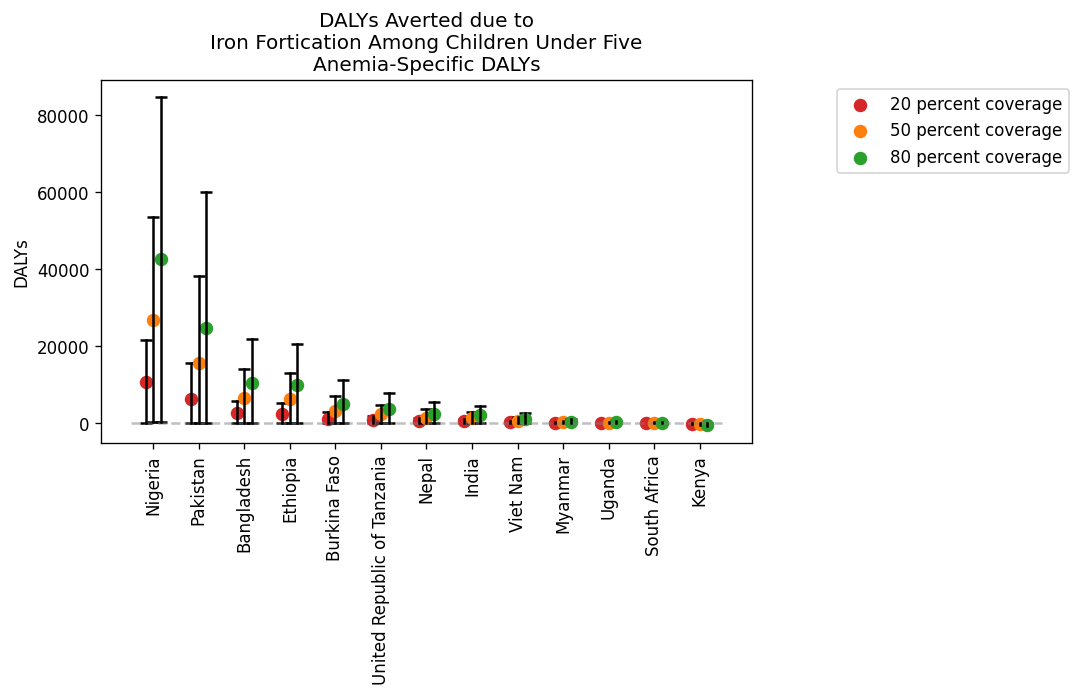

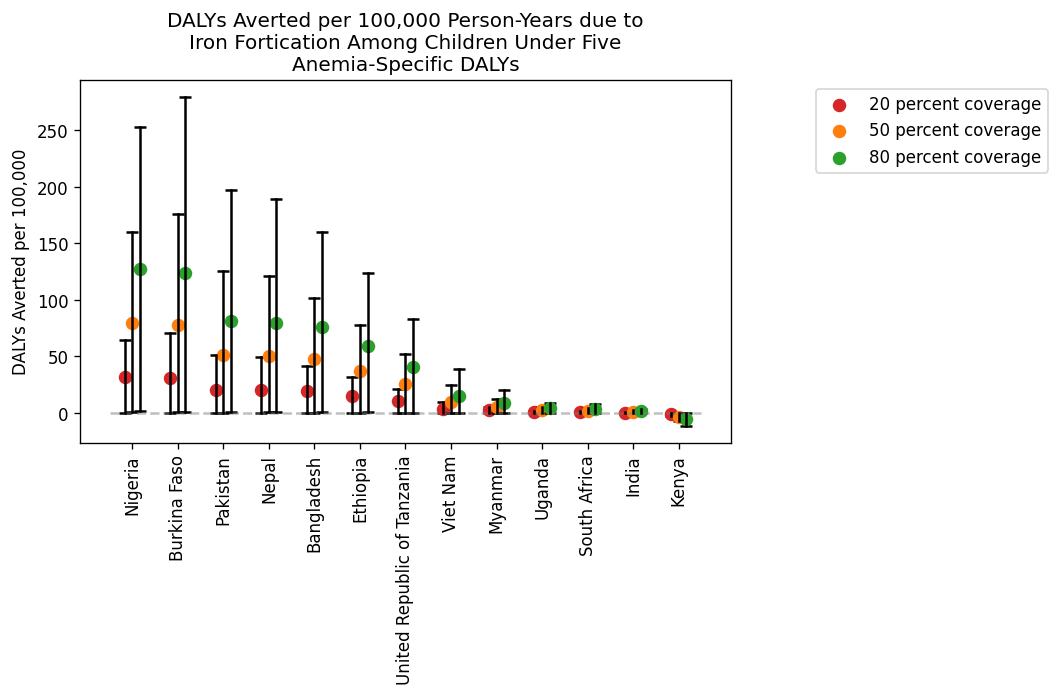

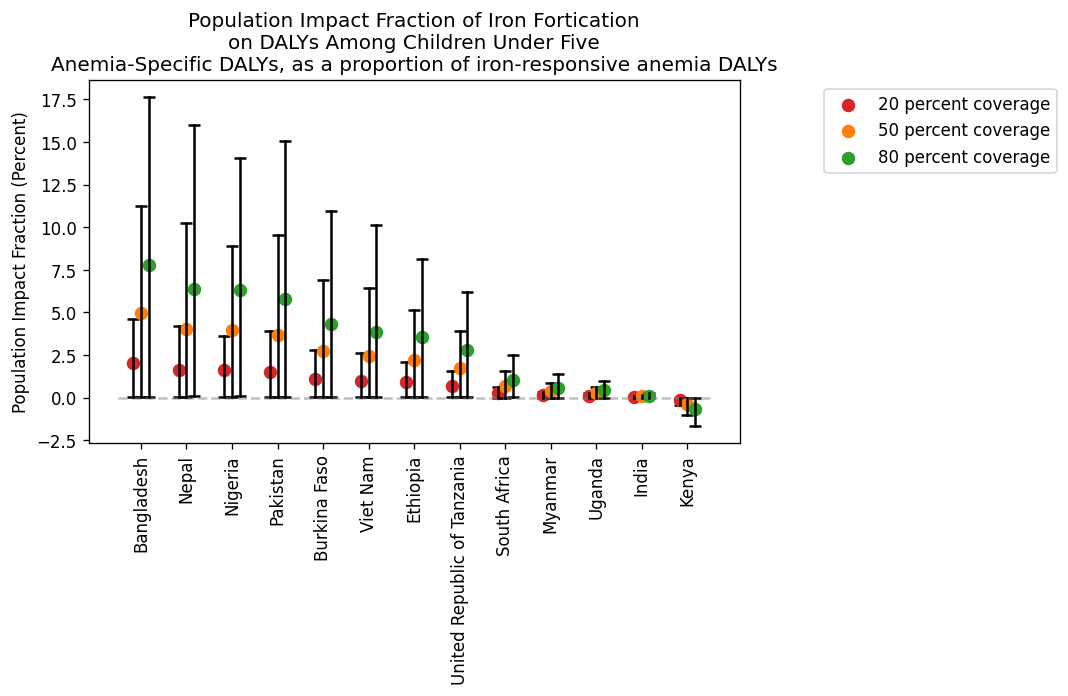

In [22]:
make_dot_plots(
    anemia_counts_averted, 
    'Iron', 
    'counts', 
    coverage_levels, 'Anemia-Specific DALYs',
    'iron_u5_anemia_counts_averted')

make_dot_plots(
    anemia_rates_averted, 
    'Iron', 
    'rates', 
    coverage_levels, 'Anemia-Specific DALYs',
    'iron_u5_anemia_rates_averted')

make_dot_plots(
    anemia_pifs, 
    'Iron', 
    'pifs', 
    coverage_levels, 'Anemia-Specific DALYs, as a proportion of iron-responsive anemia DALYs',
    'iron_u5_anemia_pif')

# LBWSG to be added ....